In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import math
from datetime import datetime

In [3]:
os.chdir('D:\\Moji fajlovi\\Master\\prog\\Project 5 - Agriculture Data Analysis')

In [4]:
data = pd.read_csv('database_biosense.csv',header=0, delimiter=';',skiprows=1)
data.head()

,Parcel,Area,Year,Crop,Seed production,Variety,Previous crop,Seed units,Manure,Fertiliser amount,...,Irrigation,Harvest,Seed,Fertiliser,Pesticide,Yield,Price,Revenue,Planting date,Harvest date
0,G-1/1,"63,38",2018,Maize,0,NS 205,Maize,184,0,"237,719575",...,9000,"11853,74",9450,"5037,277795","15202,25308","7,811454718","14,4","112484,9479",15.6.2018,15.10.2018
1,G-1/2,"23,01",2018,Barley,0,Salamandre,Maize,46,0,"238,6363636",...,0,"11762,74","8594,30605","7079,225979",1435,"7,146352313","15,8","112912,3665",28.9.2017,5.6.2018
2,G-2/1,"94,88",2018,Soybean,0,Gorstak,Maize,"100,33",0,"214,6331148",...,9000,"11549,5","10191,21689","7146,257137","11843,41404","3,388877141","37,35","126574,5612",19.4.2018,13.9.2018
3,G-2/2,"20,59",2018,Soybean,0,Wendy,Maize,"93,15",0,"140,8450704",...,0,"11571,08","5428,848956","4776,056338","12594,37882","3,71296746","37,35","138679,3346",17.4.2018,14.9.2018
4,G-3/1,"63,62",2018,Maize,0,DKC 5830,Wheat,60,"1,886199308","474,6934926",...,9000,"12801,04","19899,77051","19745,51399","4947,696479","14,60232631","14,4","210273,4989",17.4.2018,14.9.2018


In [5]:
data.isnull().any()

Parcel                    False
Area                      False
Year                      False
Crop                      False
Seed production           False
Variety                    True
Previous crop              True
Seed units                 True
Manure                    False
Fertiliser amount         False
Pesticide amount          False
Tillage                   False
Sowing                    False
Fertiliser application    False
Pesticide application     False
Irrigation                False
Harvest                   False
Seed                      False
Fertiliser                False
Pesticide                 False
Yield                     False
Price                     False
Revenue                   False
Planting date              True
Harvest date               True
dtype: bool

In [6]:
data.fillna({'Variety':'None','Previous crop': 'None','Seed units': '0'}, inplace=True)

In [7]:
convert_todot = lambda x: float(x.replace(',','.'))

In [8]:
data['Area'] = data['Area'].apply(convert_todot)

In [ ]:
l = list(data)[7:23]
for i in l:
    try:
        data[i] = data[i].apply(convert_todot)
    except ValueError:
        print(i)

In [11]:
drop = data['Planting date'].dropna()
i1 = list(drop.index.values)
newd = data.loc[i1]

In [12]:
drop2 = newd['Harvest date'].dropna()
i2 = list(drop2.index.values)
newd = newd.loc[i2]

In [13]:
convert_date = lambda x: datetime.strptime(str(x), '%d.%m.%Y')

In [14]:
newd['Planting date'] = newd['Planting date'].apply(convert_date)
newd['Harvest date'] = newd['Harvest date'].apply(convert_date)

In [15]:
crops = list(newd['Crop'].unique())
crops

['Maize',
 'Barley',
 'Soybean',
 'Wheat',
 'Sunflower',
 'Oilseed rape',
 '2nd soybean']

(array([21.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 22.,  1.]),
 array([736422. , 736465.8, 736509.6, 736553.4, 736597.2, 736641. ,
        736684.8, 736728.6, 736772.4, 736816.2, 736860. ]),
 <a list of 10 Patch objects>)

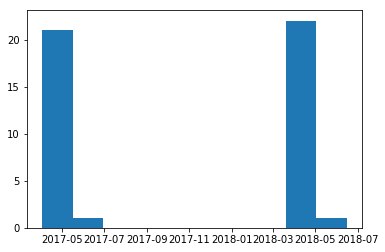

In [22]:
dd = newd[newd['Crop']==crops[0]]
plt.hist(list(dd['Planting date'].values))

(array([9., 5., 4., 3., 2., 7., 3., 5., 2., 5.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

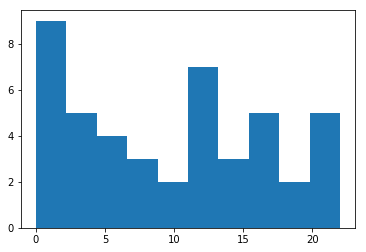

In [23]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
plant_dates = dd['Planting date'].values
plant_labels = lbl.fit_transform(plant_dates)
plt.hist(plant_labels)

TypeError: hist_frame() got multiple values for argument 'data'

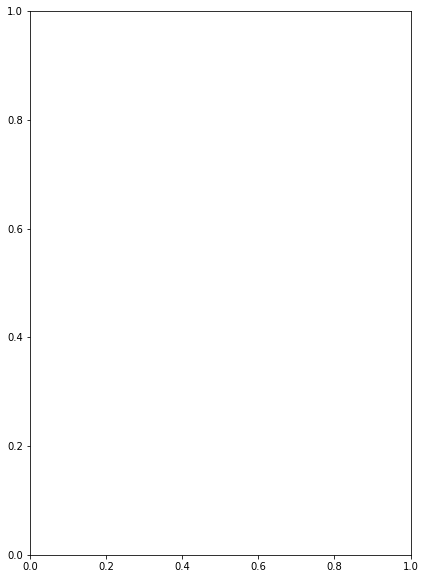

In [16]:
n = len(crops)
for i in range(n):
    fig = plt.figure(figsize=(15,10))
    
    from sklearn.preprocessing import LabelEncoder
    lbl = LabelEncoder()
    
    df = newd[newd['Crop']==crops[i]]
    
    ax1 = fig.add_subplot(121)
    plant_dates = df['Planting date'].values
    plant_labels = lbl.fit_transform(plant_dates)
    plt.hist(plant_labels)
    ax1.set_xlabel('planting date',fontsize=16)
    
    ax2 = fig.add_subplot(122)
    harvest_dates = df['Harvest date'].values
    harvest_labels = lbl.fit_transform(harvest_dates)
    plt.hist(harvest_labels)
    ax2.set_xlabel('harvest date',fontsize=16)
    
    
    fig.suptitle(crops[i], fontsize = 20, y=0.95)
#fig.tight_layout()
#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.3, wspace=0.35)
plt.show()